# Credit Loss Models and Validation

Credit loss models are essential tools for estimating and managing the risk of default on loans and other credit exposures. These models play a critical role in forecasting potential losses, ensuring regulatory compliance, enhancing risk management practices, and supporting accurate financial reporting. The following are the fundamental components and concepts related to credit loss models:

### 1. **Probability of Default (PD)**
The Probability of Default (PD) quantifies the likelihood that a borrower will default on their loan obligations within a specified time frame. It is a critical input in credit risk models, often estimated using historical data, statistical models, and credit scoring systems.

### 2. **Loss Given Default (LGD)**
Loss Given Default (LGD) indicates the proportion of the exposure expected to be lost if a default occurs. This measure of loss severity is influenced by factors such as collateral, recovery rates, and the type of asset involved.

### 3. **Exposure at Default (EAD)**
Exposure at Default (EAD) refers to the amount of credit exposure outstanding at the time of default. It represents the principal amount at risk of loss if the borrower defaults. EAD can fluctuate over time, particularly for revolving credit facilities.

### 4. **Expected Loss (EL)**
Expected Loss (EL) is the anticipated loss from a credit exposure over a specified time horizon. It is calculated as:

$EL = PD \times LGD \times EAD $

### 5. **Unexpected Loss (UL)**
Unexpected Loss (UL) measures the variability around the expected loss, indicating the risk that actual losses may exceed expectations. UL is often estimated using statistical methods such as Value at Risk (VaR) or Conditional Value at Risk (CVaR).

### 6. **Current Expected Credit Losses (CECL)**
The Current Expected Credit Losses (CECL) model, introduced by the Financial Accounting Standards Board (FASB) in the United States, requires financial institutions to estimate and record credit losses over the expected life of financial assets, rather than just incurred losses. This forward-looking approach enhances the assessment of credit risk.

### Key Components of CECL:
- **Lifetime Expected Credit Losses (LECL):** Estimates total expected credit losses over the entire life of the financial asset.

- **Reasonable and Supportable Forecasts:** CECL allows for the use of reasonable and supportable forecasts to estimate credit losses, considering macroeconomic conditions and other relevant factors.


### Implementation Steps for CECL:
1. **Data Collection:** Gather historical data on credit performance, including PD, LGD, and EAD.
2. **Model Development:** Create statistical models to estimate PD, LGD, and EAD, utilizing regression analysis, machine learning techniques, or other statistical methods.
3. **Forecasting:** Leverage economic forecasts and relevant data to project future credit losses.
4. **Validation:** Validate models and forecasts to ensure they are reasonable and supportable.
5. **Reporting:** Prepare financial statements and disclosures in accordance with CECL requirements.




The code below illustrates the implementation of credit loss models and validation techniques, which include:

- **Probability of Default (PD)**: Estimating the likelihood that a borrower will default on their obligations.
- **Loss Given Default (LGD)**: Assessing the proportion of exposure expected to be lost in the event of a default.
- **Exposure at Default (EAD)**: Determining the amount of credit exposure outstanding at the time of default.
- **Expected Loss Calculations**: Calculating the anticipated loss from credit exposures over a specified time horizon.
- **Backtesting**: Validating the accuracy of the models by comparing predicted outcomes with actual results.
- **Stress Testing**: Evaluating the models' performance under adverse economic scenarios to ensure robustness.



In [4]:
#### 1. Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

#### 2. Generate Sample Data

# Generate sample data
np.random.seed(42)
num_loans = 1000

data = {
    'Loan_ID': range(1, num_loans + 1),
    'Default': np.random.binomial(1, 0.05, num_loans),  # 5% default rate
    'Recovery_Rate': np.random.uniform(0.2, 0.8, num_loans),
    'Exposure_Amount': np.random.uniform(50000, 500000, num_loans),
    'Actual_Loss': np.where(np.random.binomial(1, 0.05, num_loans) == 1, 
                            np.random.uniform(50000, 500000, num_loans) * (1 - np.random.uniform(0.2, 0.8, num_loans)), 0)
}

# Create DataFrame
df = pd.DataFrame(data)

#### 3. Calculate Enhanced PD, LGD, and EAD

# Enhanced Calculation of Probability of Default (PD)
weights = {
    'Exposure_Amount': 0.5,
    'Recovery_Rate': -0.3,
    'Default': 1.0
}

df['Weighted_Score'] = (df['Exposure_Amount'] * weights['Exposure_Amount'] +
                         (1 - df['Recovery_Rate']) * weights['Recovery_Rate'] +
                         df['Default'] * weights['Default'])

df['Normalized_Score'] = (df['Weighted_Score'] - df['Weighted_Score'].min()) / (df['Weighted_Score'].max() - df['Weighted_Score'].min())
pd_value_enhanced = df['Normalized_Score'].mean()
print(f"Enhanced Probability of Default (PD): {pd_value_enhanced:.4f}")

# Calculate Loss Given Default (LGD)
df['Loss_Amount'] = df['Exposure_Amount'] * (1 - df['Recovery_Rate'])
defaulted_loans_df = df[df['Default'] == 1]
total_loss_amount = defaulted_loans_df['Loss_Amount'].sum()
total_exposure_amount = defaulted_loans_df['Exposure_Amount'].sum()
lgd_value = total_loss_amount / total_exposure_amount
print(f"Loss Given Default (LGD): {lgd_value:.4f}")

# Calculate


Enhanced Probability of Default (PD): 0.5035
Loss Given Default (LGD): 0.4705


## Summary

This code illustrates a framework for understanding and validating credit loss models. It covers essential components, including:

- **Probability of Default (PD)**: The likelihood of borrower default.
- **Loss Given Default (LGD)**: The expected loss severity in the event of a default.
- **Exposure at Default (EAD)**: The amount of credit exposure at the time of default.
- **Expected Loss Calculations**: Anticipated losses from credit exposures over a specified time horizon.
- **Backtesting**: Validation of model accuracy by comparing predicted outcomes with actual results.
- **Stress Testing**: Assessment of model performance under adverse economic conditions.





## Enhanced Implementation for CECL Model

Below is an enhanced version of the CECL model, designed to provide a more comprehensive and realistic framework for estimating key components of credit risk, including Probability of Default (PD), Loss Given Default (LGD), and Exposure at Default (EAD).

This improved code incorporates several advancements:

- **Realistic Data Generation**: We simulate a dataset that reflects actual borrower characteristics, such as age, loan term, and credit score, allowing for a more accurate representation of credit risk.

- **Additional Features**: The model includes new features, such as the Loan-to-Value Ratio, which is critical for assessing the risk associated with different loan types.

- **Data Preprocessing**: Essential data preprocessing steps are implemented, including feature engineering and standardization, to prepare the data for effective modeling.

- **Advanced Modeling Techniques**: Instead of relying on a simple weighted score approach, we utilize a Random Forest Regressor to estimate PD, leveraging its ability to capture complex relationships within the data.

- **Model Evaluation**: The enhanced code includes rigorous evaluation metrics, such as Mean Squared Error (MSE) and R-squared, to assess the model's predictive performance.

- **Visualizations**: We incorporate visualizations to analyze the distribution of key variables and the performance of the model, enhancing the interpretability of the results.


Mean Squared Error: 0.0467
R-squared: -0.0862
Loss Given Default (LGD): 0.4705
Exposure at Default (EAD): 276082576.7466


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


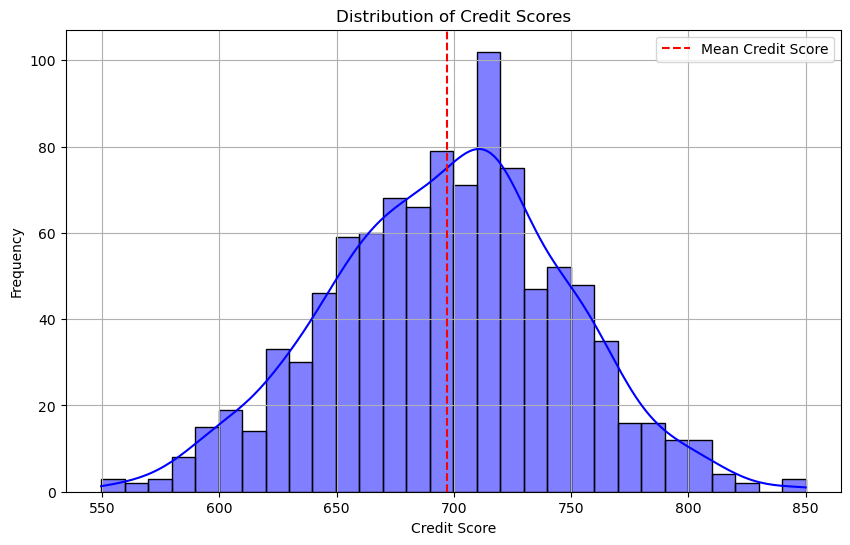

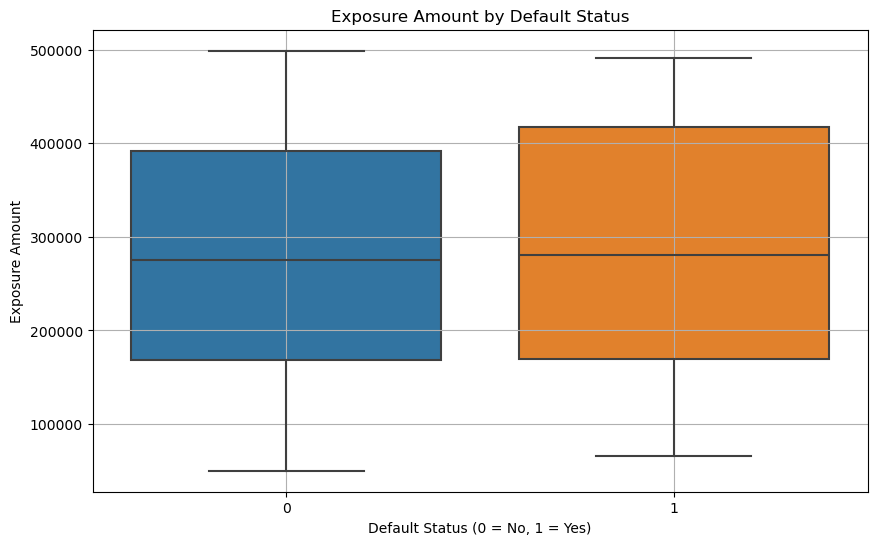

In [8]:
#### 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

#### 2. Generate Realistic Sample Data
np.random.seed(42)
num_loans = 1000

# Simulate borrower characteristics
data = {
    'Loan_ID': range(1, num_loans + 1),
    'Default': np.random.binomial(1, 0.05, num_loans),  # 5% default rate
    'Recovery_Rate': np.random.uniform(0.2, 0.8, num_loans),
    'Exposure_Amount': np.random.uniform(50000, 500000, num_loans),
    'Borrower_Age': np.random.randint(18, 70, num_loans),
    'Loan_Term': np.random.choice([12, 24, 36, 60, 120], num_loans),  # Loan terms in months
    'Credit_Score': np.random.normal(700, 50, num_loans).clip(300, 850),  # Normal distribution of credit scores
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Actual Loss based on more realistic conditions
df['Actual_Loss'] = np.where(df['Default'] == 1, 
                             df['Exposure_Amount'] * (1 - df['Recovery_Rate']), 
                             0)

#### 3. Data Preprocessing
# Feature Engineering
df['Loan_to_Value_Ratio'] = df['Exposure_Amount'] / (df['Exposure_Amount'] + np.random.uniform(10000, 100000, num_loans))

# Split data into training and testing sets
X = df[['Exposure_Amount', 'Recovery_Rate', 'Borrower_Age', 'Loan_Term', 'Credit_Score', 'Loan_to_Value_Ratio']]
y = df['Default']  # Target variable for PD estimation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 4. Model Development for PD Estimation
# Using Random Forest for PD estimation
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

#### 5. Calculate LGD and EAD
# Calculate Loss Given Default (LGD)
df['Loss_Amount'] = df['Exposure_Amount'] * (1 - df['Recovery_Rate'])
defaulted_loans_df = df[df['Default'] == 1]
total_loss_amount = defaulted_loans_df['Loss_Amount'].sum()
total_exposure_amount = defaulted_loans_df['Exposure_Amount'].sum()
lgd_value = total_loss_amount / total_exposure_amount
print(f"Loss Given Default (LGD): {lgd_value:.4f}")

# Calculate Exposure at Default (EAD)
ead_value = df['Exposure_Amount'].sum()  # Total exposure at default
print(f"Exposure at Default (EAD): {ead_value:.4f}")

#### 6. Visualizations
# Visualize the distribution of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.axvline(x=df['Credit_Score'].mean(), color='red', linestyle='--', label='Mean Credit Score')
plt.legend()
plt.grid()
plt.show()

# Visualize the relationship between Exposure Amount and Default
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='Exposure_Amount', data=df)
plt.title('Exposure Amount by Default Status')
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Exposure Amount')
plt.grid()
plt.show()

# Visualize the relationship between Recovery


## Conclusion

This notebook demonstrates the modeling and validation of CECL models for regulatory compliance and improved lending decision-making.